In [1]:
from typing import List, Optional, Tuple, Union

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

import utils as u
from models import raw
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)

In [2]:
def abbrange(letter:str, a:int, b:int)->Tuple[str]:
    return (f"{letter}{i:02}" for i in range(a,b))

In [3]:
d_abbrs = (*abbrange("D", 1, 7), "D09", "D11", "D12", "D13", "D14", "D16", *abbrange("D", 18, 23))
m_abbrs = abbrange("M", 1, 8)
# p_abbrs = (*abbrange("P", 1, 5), *abbrange("P", 6, 12))
r_abbrs = ("R02", "R03", "R09")
s_abbrs = (*abbrange("S", 1, 11), "S21", "S22", "S23", "S28", "S29", "S30", "S31")
t_abbrs = ("TB",)

abbrs = (
    *d_abbrs,
    *m_abbrs,
    # *p_abbrs,
    *r_abbrs,
    *s_abbrs,
    # *t_abbrs,
)

colors = u.COLORS
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

# highlighted_abbrs = ("M03", "M04", "M05", "M06")
highlighted_abbrs = ("Coucou",)


def add_terrain_legend(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure], highlighted: Optional[List[str]] = None):
    legend_handles = [mpatches.Patch(color=col, label=lab) for lab, col in colors.items()]
    if highlighted is not None:
        legend_handles.extend([mpatches.Patch(color="xkcd:bright red", label=lab) for lab in highlighted])
    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    mpl_elem.legend(
        handles=legend_handles, ncol=len(colors), bbox_to_anchor=(0.5, -0.03), loc="upper center", title="Terrain"
    )


In [4]:
dfs = {}
pbar = tqdm(abbrs)
for abbr in pbar:
    pbar.set_description(abbr)
    preprocess(abbr, verbose=False)
    pentz_df = raw.raw(abbr, verbose=False);
    dfs[abbr] = pentz_df


S31: 100%|██████████| 44/44 [00:33<00:00,  1.30it/s]


In [5]:
model_name = raw.__MODEL_NAME__.lower()
figdir = u.get_figdir("summary", subdir=model_name)
model_name = raw.__MODEL_NAME__.title()


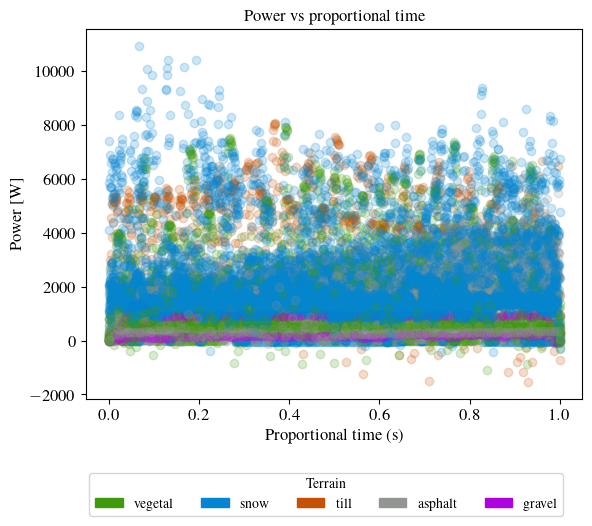

In [6]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    col = "r" if abbr in highlighted_abbrs else col
    ax.plot(dfs[abbr].time_ratio, dfs[abbr].P_motion, color=col, linestyle="", marker="o", label=abbr, alpha=0.2)
# ax.set_ylim((0, 4))
add_terrain_legend(fig)
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Proportional time (s)")
ax.set_ylabel("Power [W]")
ax.set_title(f"Power vs proportional time")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_power.jpg", bbox_inches="tight")
